In [ ]:
!pip install nest_asyncio
!pip3 install --user --upgrade git+https://github.com/twintproject/twint.git@origin/master#egg=twint
!pip install tweepy

#Restart after run

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/twintproject/twint.git (to revision origin/master) to /tmp/pip-install-rhrpy21v/twint_d1f571df9f724db88e1b0062004d9553
  Running command git clone -q https://github.com/twintproject/twint.git /tmp/pip-install-rhrpy21v/twint_d1f571df9f724db88e1b0062004d9553
  Running command git checkout -q origin/master
     |████████████████████████████████| 263 kB 7.5 MB/s 
     |████████████████████████████████| 385 kB 53.2 MB/s 
     |████████████████████████████████| 288 kB 59.2 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 59 kB 6.6 MB/s 
     |████████████████████████████████| 140 kB 57.1 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Created wheel for twint: filename=twint-2.1.21-py3-none-any.whl siz

In [ ]:
import twint
import nest_asyncio
import pandas as pd
pd.options.mode.chained_assignment = None 
import json
import tweepy
from datetime import datetime
import time
import numpy as np
import base64
import requests
from tqdm import tqdm
import glob
import os

nest_asyncio.apply()

In [ ]:
list_key =["kebocoran data simcard OR kebocoran data sim card",
        "data simcard OR data sim card",
        "kominfo bocor OR kominfo bocor data sim"]

In [ ]:
for j in list_key :
#         print(i)
    print(j)
    c = twint.Config()
    c.Search = j
    c.Lang = 'id'
    # c.Location = True
    c.Since = '2022-09-01'
    c.Until = '2022-09-08'
    c.Count = True
    c.Retweets = True
    c.Stats = True
    c.Show_hashtags = True
    c.Hide_output = True
    c.Profile_full = True
    c.Store_csv = True
    # c.Links = 'include'
    # c.Output = "./ep/"+j+' links.csv'
    c.Links = 'exclude'
    c.Output = "./ep/"+j+'.exclude links.csv'
#   c.Resume = 'resume.txt'
    twint.run.Search(c)
    

kebocoran data simcard OR kebocoran data sim card
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 34 Tweets.
data simcard OR data sim card
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 380 Tweets.
kominfo bocor OR kominfo bocor data sim
[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.
[+] Finished: Successfully collected 46 Tweets.


In [ ]:
Listfile = glob.glob("/content/ep/*")
# Listfile
dfs = [pd.read_csv(f) for f in Listfile]
df = pd.concat(dfs, ignore_index=True)

In [ ]:
# Remove data that duplicate
df.drop_duplicates()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1567651658913685504,1567530929308016640,2022-09-07 23:10:55 UTC,2022-09-07,23:10:55,0,1409789669336764424,natanaelsirega9,Natanael Siregar,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'detikcom', 'name': 'detikcom...",NaN,NaN,NaN,NaN
1,1567650977175707648,1567530929308016640,2022-09-07 23:08:13 UTC,2022-09-07,23:08:13,0,1409789669336764424,natanaelsirega9,Natanael Siregar,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'detikcom', 'name': 'detikcom...",NaN,NaN,NaN,NaN
2,1567640066704523266,1567640066704523266,2022-09-07 22:24:51 UTC,2022-09-07,22:24:51,0,243904689,big_data_eng,Ahm3d,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1567633734928580608,1567605425754841091,2022-09-07 21:59:42 UTC,2022-09-07,21:59:42,0,194109234,flowjamaica,FLOW Jamaica,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'DalveyG', 'name': 'George Gr...",NaN,NaN,NaN,NaN
4,1567627529502216193,1567486361791516672,2022-09-07 21:35:02 UTC,2022-09-07,21:35:02,0,1560327913714913280,mrx009900,mr. x,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CNNIndonesia', 'name': 'CNN ...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1565335080108965895,1565334232675028992,2022-09-01 13:45:40 UTC,2022-09-01,13:45:40,0,1501028490279518208,iconman221,I€oni∆ Pir∆teX☠️IDN,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1678,1565329763245654017,1565267906480717825,2022-09-01 13:24:32 UTC,2022-09-01,13:24:32,0,1090255496857018368,yosaris9,Aris Dekik,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Aryprasetyo85', 'name': 'Ary...",NaN,NaN,NaN,NaN
1680,1565305078944497664,1565279801057091584,2022-09-01 11:46:27 UTC,2022-09-01,11:46:27,0,1371566356093489152,arinuzula,Denok,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'hyang_wisnu', 'name': 'Batar...",NaN,NaN,NaN,NaN
1682,1565233517121835008,1565233517121835008,2022-09-01 07:02:05 UTC,2022-09-01,07:02:05,0,1530139557517094912,carollinenatty,CarollineNatty,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
#export to csv for all the combine
df.to_csv("./ep/combine.csv", index=False)

In [ ]:
# remove that are not in indonesian
df_filtered_lang = df[df['language'] == 'in']
df_filtered_lang

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1567651658913685504,1567530929308016640,2022-09-07 23:10:55 UTC,2022-09-07,23:10:55,0,1409789669336764424,natanaelsirega9,Natanael Siregar,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'detikcom', 'name': 'detikcom...",NaN,NaN,NaN,NaN
1,1567650977175707648,1567530929308016640,2022-09-07 23:08:13 UTC,2022-09-07,23:08:13,0,1409789669336764424,natanaelsirega9,Natanael Siregar,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'detikcom', 'name': 'detikcom...",NaN,NaN,NaN,NaN
4,1567627529502216193,1567486361791516672,2022-09-07 21:35:02 UTC,2022-09-07,21:35:02,0,1560327913714913280,mrx009900,mr. x,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'CNNIndonesia', 'name': 'CNN ...",NaN,NaN,NaN,NaN
11,1567587767319928833,1567587767319928833,2022-09-07 18:57:02 UTC,2022-09-07,18:57:02,0,1197469917567565825,poisonfromuncle,🦊,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
16,1567562315645747201,1567555304199696384,2022-09-07 17:15:54 UTC,2022-09-07,17:15:54,0,228454118,sinyo_swana,swana.inyoman,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'nuinugraha', 'name': 'Sanugr...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,1565261609345241088,1564949885459525633,2022-09-01 08:53:43 UTC,2022-09-01,08:53:43,0,793993894774112256,keen1792,kinankinan,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kemkominfo', 'name': 'Kement...",NaN,NaN,NaN,NaN
1682,1565233517121835008,1565233517121835008,2022-09-01 07:02:05 UTC,2022-09-01,07:02:05,0,1530139557517094912,carollinenatty,CarollineNatty,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1683,1565229003300306944,1565229003300306944,2022-09-01 06:44:09 UTC,2022-09-01,06:44:09,0,1538370244070125570,iyaadarius,Darius,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1684,1565216284195065856,1565216284195065856,2022-09-01 05:53:37 UTC,2022-09-01,05:53:37,0,1206321124960681984,asepnm7,kangcilok,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
tweet = df_filtered_lang['tweet']

In [ ]:
#remove username from tweets

import re
pattern = r'(?:&amp;|@[a-zA-Z0-9_]*)'
new =[]
for row in tweet:
    row = re.sub(pattern,"",row)
    new.append(row)
# string = "@alisyarief Merka selalu mengunakan data nik ketika kita berurusan dgn negara,ko bisa kita disuruh jaga sndiri."
# # pattern = r'@[a-zA-Z0-9_]*'
# string = re.sub(pattern,"",string)
# string




In [ ]:
new

[' Saran, aktifasi SIM card pake nik di hapus ...krna membahayakan soalnya negara tidak mampu melindungi data rakyat nya',
 ' Mau kata apalagi untuk menggambarkan menteri yg ga bisa kerja ...SIM card di suruh aktif pake no nik ktp,  bocor data nya tpie ga mau tanggung jawab...klo di luar negeri sdh mundur',
 ' Pake sim card dipaksa pakai ktp dan kk...giliran data bocor ga tanggung jawab....kalau dungu jangan diborong bro..',
 'Lagi ribut data SIM card bocor lah dulu kampus gua data mahasiswanya berserakan di internet lengkap banget lagi itu ditemuin si , sampe datanya dipake buat aplikasi cek nilai anak anak hahahah sampe akhirnya disalah gunakan malah buat ajang bagus bagusan nilai',
 ' Jelas gak bisa ngatasin sendiri, sementara data kita ada di pemerintah NIK dan sim card. Kecuali platformnya bikin sendiri relatif lebih aman.',
 ' kemarin2 maksa PSTE Privat wajib daftar. katanya utk lindungi negara  masyarakat. Trs,saat hacker geruduk data sim card penduduk +62, sm  cuma bs blg ke ha

In [ ]:
df_filtered_lang['tweet_remove'] = new

In [ ]:
df_filtered_lang.to_csv("./ep/filterunameid.csv", index=False)

# Data Cleaning

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
# import spacy
import string
from nltk.corpus import stopwords
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 7.3 MB/s 


In [ ]:
def remove_unused_char(texts) :
  data = texts.map(lambda x:x.lower())
  
  data = data.map(lambda x: re.sub(r'[^a-zA-Z0-9 ]', r'', str(x))) # Remove unused character
  data = data.map(lambda x: re.sub('[!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]', '', str(x))) # Remove punctuation
  data = data.map(lambda x: re.sub('[0123456789]', '', str(x))) #Remove number

  data = data.map(lambda x: x.lstrip())
    
  data = data.map(lambda x: re.sub(r'@\S+', '', x)) # Remove mention
  data = data.map(lambda x: re.sub(r'#\S+', '', x)) # Remove hashtag
  data = data.map(lambda x: re.sub(r'https\S+', '', x)) # Remove URL

  return data

In [ ]:
unclean_data = df_filtered_lang
tweets = unclean_data[['tweet_remove']]
tweets
preprocessed = remove_unused_char(tweets.tweet_remove)
unclean_data['tweet_preprocessed'] = preprocessed

In [ ]:
unclean_data

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,tweet_remove,tweet_preprocessed
0,1567651658913685504,1567530929308016640,2022-09-07 23:10:55 UTC,2022-09-07,23:10:55,0,1409789669336764424,natanaelsirega9,Natanael Siregar,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'detikcom', 'name': 'detikcom...",NaN,NaN,NaN,NaN,"Saran, aktifasi SIM card pake nik di hapus .....",saran aktifasi sim card pake nik di hapus krna...
1,1567650977175707648,1567530929308016640,2022-09-07 23:08:13 UTC,2022-09-07,23:08:13,0,1409789669336764424,natanaelsirega9,Natanael Siregar,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'detikcom', 'name': 'detikcom...",NaN,NaN,NaN,NaN,Mau kata apalagi untuk menggambarkan menteri ...,mau kata apalagi untuk menggambarkan menteri y...
4,1567627529502216193,1567486361791516672,2022-09-07 21:35:02 UTC,2022-09-07,21:35:02,0,1560327913714913280,mrx009900,mr. x,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'CNNIndonesia', 'name': 'CNN ...",NaN,NaN,NaN,NaN,Pake sim card dipaksa pakai ktp dan kk...gili...,pake sim card dipaksa pakai ktp dan kkgiliran ...
11,1567587767319928833,1567587767319928833,2022-09-07 18:57:02 UTC,2022-09-07,18:57:02,0,1197469917567565825,poisonfromuncle,🦊,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Lagi ribut data SIM card bocor lah dulu kampus...,lagi ribut data sim card bocor lah dulu kampus...
16,1567562315645747201,1567555304199696384,2022-09-07 17:15:54 UTC,2022-09-07,17:15:54,0,228454118,sinyo_swana,swana.inyoman,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'nuinugraha', 'name': 'Sanugr...",NaN,NaN,NaN,NaN,"Jelas gak bisa ngatasin sendiri, sementara da...",jelas gak bisa ngatasin sendiri sementara data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,1565261609345241088,1564949885459525633,2022-09-01 08:53:43 UTC,2022-09-01,08:53:43,0,793993894774112256,keen1792,kinankinan,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'kemkominfo', 'name': 'Kement...",NaN,NaN,NaN,NaN,"Kerja yang bener,plis. Pak Joni jgn lp dipang...",kerja yang benerplis pak joni jgn lp dipanggil...
1682,1565233517121835008,1565233517121835008,2022-09-01 07:02:05 UTC,2022-09-01,07:02:05,0,1530139557517094912,carollinenatty,CarollineNatty,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"😅 yang bener aja Kominfo, data sim bocor, data...",yang bener aja kominfo data sim bocor data per...
1683,1565229003300306944,1565229003300306944,2022-09-01 06:44:09 UTC,2022-09-01,06:44:09,0,1538370244070125570,iyaadarius,Darius,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Awal bulan ceria walau harga BBM sudah tidak c...,awal bulan ceria walau harga bbm sudah tidak c...
1684,1565216284195065856,1565216284195065856,2022-09-01 05:53:37 UTC,2022-09-01,05:53:37,0,1206321124960681984,asepnm7,kangcilok,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"1.3 milliar data registrasi kartu sim bocor , ...",milliar data registrasi kartu sim bocor lalu ...


In [ ]:
slang = {"@": "di", "abis": "habis", "ad": "ada", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", 
         "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", 
         "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", 
         "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", 
         "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", 
         "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", 
         "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", 
         "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", 
         "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", 
         "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", 
         "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", 
         "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", 
         "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", 
         "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", 
         "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", 
         "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", 
         "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", 
         "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", 
         "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", 
         "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", 
         "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", 
         "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", 
         "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", 
         "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", 
         "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", 
         "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", 
         "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", 
         "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", 
         "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", 
         "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", 
         "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", 
         "ga" : "tidak", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang","blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin","az":"astrazeneca", "mdrn":"moderna","pfz":"pfizer","bhw":"bahwa", "btl":"betul","pinjol":"pinjaman online"}


In [ ]:
unclean_data['tweet_preprocessed'] = unclean_data['tweet_preprocessed'].astype(str).apply(lambda x: ' '.join(slang.get(word, word) for word in x.split()))
clean_data_slang = unclean_data
# clean_data_slang = clean_data_slang.dropna()
clean_data_slang

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,tweet_remove,tweet_preprocessed
0,1567651658913685504,1567530929308016640,2022-09-07 23:10:55 UTC,2022-09-07,23:10:55,0,1409789669336764424,natanaelsirega9,Natanael Siregar,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'detikcom', 'name': 'detikcom...",NaN,NaN,NaN,NaN,"Saran, aktifasi SIM card pake nik di hapus .....",saran aktifasi sim card pakai nik di hapus krn...
1,1567650977175707648,1567530929308016640,2022-09-07 23:08:13 UTC,2022-09-07,23:08:13,0,1409789669336764424,natanaelsirega9,Natanael Siregar,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'detikcom', 'name': 'detikcom...",NaN,NaN,NaN,NaN,Mau kata apalagi untuk menggambarkan menteri ...,mau kata apalagi untuk menggambarkan menteri y...
4,1567627529502216193,1567486361791516672,2022-09-07 21:35:02 UTC,2022-09-07,21:35:02,0,1560327913714913280,mrx009900,mr. x,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'CNNIndonesia', 'name': 'CNN ...",NaN,NaN,NaN,NaN,Pake sim card dipaksa pakai ktp dan kk...gili...,pakai sim card dipaksa pakai ktp dan kkgiliran...
11,1567587767319928833,1567587767319928833,2022-09-07 18:57:02 UTC,2022-09-07,18:57:02,0,1197469917567565825,poisonfromuncle,🦊,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Lagi ribut data SIM card bocor lah dulu kampus...,lagi ribut data sim card bocor lah dulu kampus...
16,1567562315645747201,1567555304199696384,2022-09-07 17:15:54 UTC,2022-09-07,17:15:54,0,228454118,sinyo_swana,swana.inyoman,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'nuinugraha', 'name': 'Sanugr...",NaN,NaN,NaN,NaN,"Jelas gak bisa ngatasin sendiri, sementara da...",jelas gak bisa ngatasin sendiri sementara data...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,1565261609345241088,1564949885459525633,2022-09-01 08:53:43 UTC,2022-09-01,08:53:43,0,793993894774112256,keen1792,kinankinan,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'kemkominfo', 'name': 'Kement...",NaN,NaN,NaN,NaN,"Kerja yang bener,plis. Pak Joni jgn lp dipang...",kerja yang benerplis pak joni jangan lupa dipa...
1682,1565233517121835008,1565233517121835008,2022-09-01 07:02:05 UTC,2022-09-01,07:02:05,0,1530139557517094912,carollinenatty,CarollineNatty,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"😅 yang bener aja Kominfo, data sim bocor, data...",yang benar saja kominfo data sim bocor data pe...
1683,1565229003300306944,1565229003300306944,2022-09-01 06:44:09 UTC,2022-09-01,06:44:09,0,1538370244070125570,iyaadarius,Darius,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Awal bulan ceria walau harga BBM sudah tidak c...,awal bulan ceria walau harga bbm sudah tidak c...
1684,1565216284195065856,1565216284195065856,2022-09-01 05:53:37 UTC,2022-09-01,05:53:37,0,1206321124960681984,asepnm7,kangcilok,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"1.3 milliar data registrasi kartu sim bocor , ...",milliar data registrasi kartu sim bocor lalu a...


In [ ]:
data=[]
i = 1
for tweet in clean_data_slang['tweet_preprocessed']:
    katadasar = str(tweet)
    stop = stopword.remove(katadasar)
    hasil=(" ".join(stop.split()))
    data.append([hasil])


In [ ]:
data = pd.DataFrame(data,columns=['tweet_processing'])
clean_data = clean_data_slang.reset_index().drop(['index'], axis=1)
data
clean_data['tweet_preprocessed'] = data['tweet_processing']
clean_data


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,tweet_remove,tweet_preprocessed
0,1567651658913685504,1567530929308016640,2022-09-07 23:10:55 UTC,2022-09-07,23:10:55,0,1409789669336764424,natanaelsirega9,Natanael Siregar,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'detikcom', 'name': 'detikcom...",NaN,NaN,NaN,NaN,"Saran, aktifasi SIM card pake nik di hapus .....",saran aktifasi sim card pakai nik hapus krna m...
1,1567650977175707648,1567530929308016640,2022-09-07 23:08:13 UTC,2022-09-07,23:08:13,0,1409789669336764424,natanaelsirega9,Natanael Siregar,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'detikcom', 'name': 'detikcom...",NaN,NaN,NaN,NaN,Mau kata apalagi untuk menggambarkan menteri ...,mau kata untuk menggambarkan menteri kerja sim...
2,1567627529502216193,1567486361791516672,2022-09-07 21:35:02 UTC,2022-09-07,21:35:02,0,1560327913714913280,mrx009900,mr. x,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'CNNIndonesia', 'name': 'CNN ...",NaN,NaN,NaN,NaN,Pake sim card dipaksa pakai ktp dan kk...gili...,pakai sim card dipaksa pakai ktp kkgiliran dat...
3,1567587767319928833,1567587767319928833,2022-09-07 18:57:02 UTC,2022-09-07,18:57:02,0,1197469917567565825,poisonfromuncle,🦊,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Lagi ribut data SIM card bocor lah dulu kampus...,ribut data sim card bocor lah dulu kampus data...
4,1567562315645747201,1567555304199696384,2022-09-07 17:15:54 UTC,2022-09-07,17:15:54,0,228454118,sinyo_swana,swana.inyoman,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'nuinugraha', 'name': 'Sanugr...",NaN,NaN,NaN,NaN,"Jelas gak bisa ngatasin sendiri, sementara da...",jelas gak ngatasin sendiri data ada pemerintah...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1565261609345241088,1564949885459525633,2022-09-01 08:53:43 UTC,2022-09-01,08:53:43,0,793993894774112256,keen1792,kinankinan,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'kemkominfo', 'name': 'Kement...",NaN,NaN,NaN,NaN,"Kerja yang bener,plis. Pak Joni jgn lp dipang...",kerja benerplis pak joni jangan lupa dipanggil...
1426,1565233517121835008,1565233517121835008,2022-09-01 07:02:05 UTC,2022-09-01,07:02:05,0,1530139557517094912,carollinenatty,CarollineNatty,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"😅 yang bener aja Kominfo, data sim bocor, data...",benar kominfo data sim bocor data perduli lind...
1427,1565229003300306944,1565229003300306944,2022-09-01 06:44:09 UTC,2022-09-01,06:44:09,0,1538370244070125570,iyaadarius,Darius,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,Awal bulan ceria walau harga BBM sudah tidak c...,awal bulan ceria harga bbm tidak ceria biasa n...
1428,1565216284195065856,1565216284195065856,2022-09-01 05:53:37 UTC,2022-09-01,05:53:37,0,1206321124960681984,asepnm7,kangcilok,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,"1.3 milliar data registrasi kartu sim bocor , ...",milliar data registrasi kartu sim bocor lalu a...


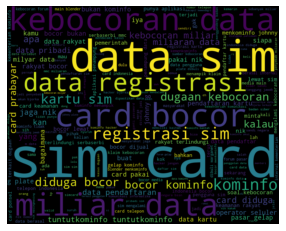

In [ ]:
# Plot The Word Cloud
import os
os.path
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allWords  = ' '.join( [str (twts) for twts in clean_data['tweet_preprocessed']])
wordCloud = WordCloud(width = 1000, height=800, random_state=21, max_font_size=400).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Get only relevant column (original tweet, links, preprocessed)
clean_data.dtypes

id                      int64
conversation_id         int64
created_at             object
date                   object
time                   object
timezone                int64
user_id                 int64
username               object
name                   object
place                 float64
tweet                  object
language               object
mentions               object
urls                   object
photos                 object
replies_count           int64
retweets_count          int64
likes_count             int64
hashtags               object
cashtags               object
link                   object
retweet                  bool
quote_url              object
video                   int64
thumbnail              object
near                  float64
geo                   float64
source                float64
user_rt_id            float64
user_rt               float64
retweet_id            float64
reply_to               object
retweet_date          float64
translate 

In [ ]:
cleaner_data = clean_data[['link','tweet', 'tweet_preprocessed']]
cleaner_data

,link,tweet,tweet_preprocessed
0,https://twitter.com/NatanaelSirega9/status/156...,"@detikcom Saran, aktifasi SIM card pake nik di...",saran aktifasi sim card pakai nik hapus krna m...
1,https://twitter.com/NatanaelSirega9/status/156...,@detikcom Mau kata apalagi untuk menggambarkan...,mau kata untuk menggambarkan menteri kerja sim...
2,https://twitter.com/MrX009900/status/156762752...,@CNNIndonesia Pake sim card dipaksa pakai ktp ...,pakai sim card dipaksa pakai ktp kkgiliran dat...
3,https://twitter.com/Poisonfromuncle/status/156...,Lagi ribut data SIM card bocor lah dulu kampus...,ribut data sim card bocor lah dulu kampus data...
4,https://twitter.com/sinyo_swana/status/1567562...,"@nuinugraha Jelas gak bisa ngatasin sendiri, s...",jelas gak ngatasin sendiri data ada pemerintah...
...,...,...,...
1425,https://twitter.com/keen1792/status/1565261609...,"@kemkominfo Kerja yang bener,plis. Pak Joni jg...",kerja benerplis pak joni jangan lupa dipanggil...
1426,https://twitter.com/CarollineNatty/status/1565...,"😅 yang bener aja Kominfo, data sim bocor, data...",benar kominfo data sim bocor data perduli lind...
1427,https://twitter.com/iyaadarius/status/15652290...,Awal bulan ceria walau harga BBM sudah tidak c...,awal bulan ceria harga bbm tidak ceria biasa n...
1428,https://twitter.com/asepnm7/status/15652162841...,"1.3 milliar data registrasi kartu sim bocor , ...",milliar data registrasi kartu sim bocor lalu a...


In [ ]:
clean_data.to_excel("./ep/clean.xlsx", sheet_name="output", index=False)

In [ ]:
cleaner_data.to_excel("./ep/cleaner.xlsx", sheet_name="output", index=False)

In [ ]:
!zip -r "/content/ep.zip" "/content/ep/"

  adding: content/ep/ (stored 0%)
  adding: content/ep/clean.xlsx (deflated 6%)
  adding: content/ep/data simcard OR data sim card.exclude links.csv (deflated 65%)
  adding: content/ep/kebocoran data simcard OR kebocoran data sim card.exclude links.csv (deflated 66%)
  adding: content/ep/filterunameid.csv (deflated 78%)
  adding: content/ep/combine.csv (deflated 72%)
  adding: content/ep/kominfo bocor OR kominfo bocor data sim links.csv (deflated 75%)
  adding: content/ep/data simcard OR data sim card links.csv (deflated 73%)
  adding: content/ep/kebocoran data simcard OR kebocoran data sim card links.csv (deflated 76%)
  adding: content/ep/kominfo bocor OR kominfo bocor data sim.exclude links.csv (deflated 68%)
